In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
data1=pd.read_csv("Unemployment in india.csv")
data2=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [3]:
#displaying the first few rows of the data sets
print("Dataset Head: Unemployment in india")
print(data1.head())


Dataset Head: Unemployment in india
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139                                     43.24  Rural  
1             11755881                                     42.05  Rural  
2             12086707                                     43.50  Rural  
3             12285693                                     43.97  Rural  
4             12256762                                     44.68  Rural  


In [4]:
print("Unemployment rate upto 11 2020")
print(data2.head())

Unemployment rate upto 11 2020
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    1

In [5]:
print(data1.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [6]:
#the column names are too long therefore renaming them
data1.rename(columns={" Estimated Unemployment Rate (%)":"U rate",
                           " Estimated Employed": "Employed",
                           " Estimated Labour Participation Rate (%)":"P Rate"}, inplace=True)

In [7]:
print(data1.columns)

Index(['Region', ' Date', ' Frequency', 'U rate', 'Employed', 'P Rate',
       'Area'],
      dtype='object')


In [8]:
print(data1.head())

           Region         Date  Frequency  U rate  Employed  P Rate   Area
0  Andhra Pradesh   31-05-2019    Monthly    3.65  11999139   43.24  Rural
1  Andhra Pradesh   30-06-2019    Monthly    3.05  11755881   42.05  Rural
2  Andhra Pradesh   31-07-2019    Monthly    3.75  12086707   43.50  Rural
3  Andhra Pradesh   31-08-2019    Monthly    3.32  12285693   43.97  Rural
4  Andhra Pradesh   30-09-2019    Monthly    5.17  12256762   44.68  Rural


In [9]:
#renamingfor the second table
print(data2.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [10]:
data2.rename(columns={" Frequency":"freq",
                      " Estimated Unemployment Rate (%)":"U2Rate",
                      " Estimated Employed":"employed",
                      " Estimated Labour Participation Rate (%)":"P2Rate","longitude":"lon","latitude":"lat"}, inplace=True)

In [11]:
print(data2.columns)

Index(['Region', ' Date', 'freq', 'U2Rate', 'employed', 'P2Rate', 'Region.1',
       'lon', 'lat'],
      dtype='object')


In [12]:
print(data2.head())

           Region         Date freq  U2Rate  employed  P2Rate Region.1  \
0  Andhra Pradesh   31-01-2020    M    5.48  16635535   41.02    South   
1  Andhra Pradesh   29-02-2020    M    5.83  16545652   40.90    South   
2  Andhra Pradesh   31-03-2020    M    5.79  15881197   39.18    South   
3  Andhra Pradesh   30-04-2020    M   20.51  11336911   33.10    South   
4  Andhra Pradesh   31-05-2020    M   17.43  12988845   36.46    South   

       lon    lat  
0  15.9129  79.74  
1  15.9129  79.74  
2  15.9129  79.74  
3  15.9129  79.74  
4  15.9129  79.74  


using the latitude and longitude information to show the physical location of the areas in the data

In [13]:
map_data=data2[['Region','lon','lat']]
print(map_data)

             Region      lon     lat
0    Andhra Pradesh  15.9129  79.740
1    Andhra Pradesh  15.9129  79.740
2    Andhra Pradesh  15.9129  79.740
3    Andhra Pradesh  15.9129  79.740
4    Andhra Pradesh  15.9129  79.740
..              ...      ...     ...
262     West Bengal  22.9868  87.855
263     West Bengal  22.9868  87.855
264     West Bengal  22.9868  87.855
265     West Bengal  22.9868  87.855
266     West Bengal  22.9868  87.855

[267 rows x 3 columns]


In [14]:
#ploting the map
import folium
center_lat=map_data['lat'].mean()
center_lon=map_data['lon'].mean()
m=folium.Map(location=[center_lat, center_lon],zoom_start=5)

#adding markers in each place
for i, row in map_data.iterrows():
    folium.Marker(
    location=[row['lat'], row['lon']],
    popup=row['Region']
    ).add_to(m)
    
m.save('map.html')
m

In [15]:
#data cleaning
missing=data1.isnull().sum()
print("\nMissing values:")
print(missing[missing>0])


Missing values:
Series([], dtype: int64)


## Visualizing the data and possible conclusions

1. Time Series Plot to understand Unemployment Rate Over Time
Purpose is to observe the trend in the unemployment rate over time and identify any significant fluctuations or patterns.


In [16]:
print(data1.columns)

Index(['Region', ' Date', ' Frequency', 'U rate', 'Employed', 'P Rate',
       'Area'],
      dtype='object')


In [26]:
print(type(data1.loc[1][' Date']))

<class 'str'>


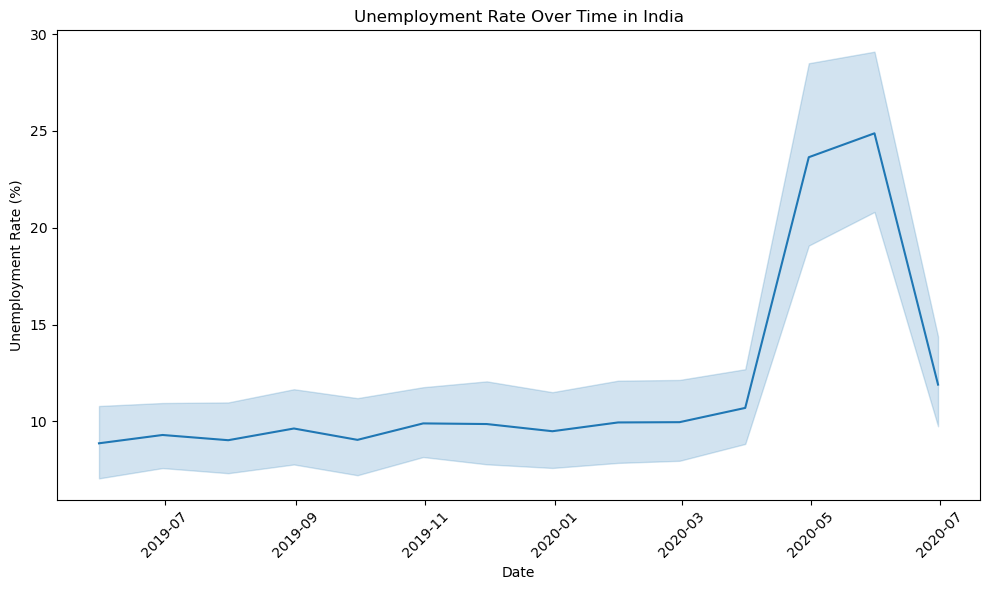

In [30]:
# Converting the date column to datetime format
data1[' Date'] = pd.to_datetime(data1[' Date'], dayfirst=True)


plt.figure(figsize=(10, 6))
sns.lineplot(x=' Date', y='U rate', data=data1)
plt.title('Unemployment Rate Over Time in India')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. Regional Unemployment Rate Comparison
Purpose: To compare the unemployment rate across different regions at a specific point in time (e.g., average unemployment rate).

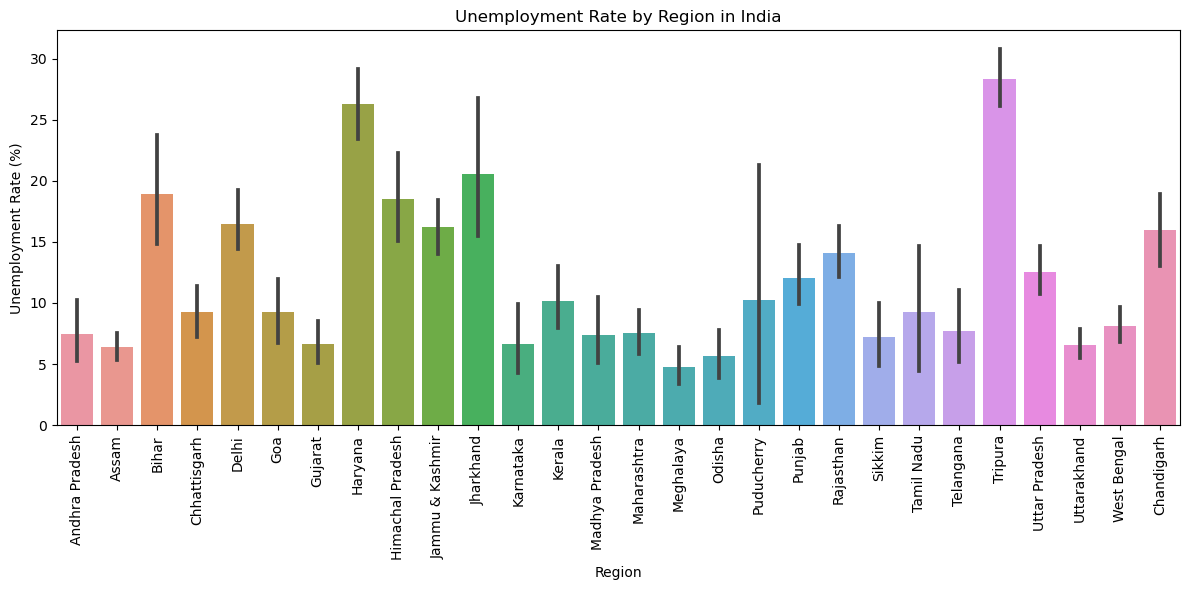

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='U rate', data=data1)
plt.title('Unemployment Rate by Region in India')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


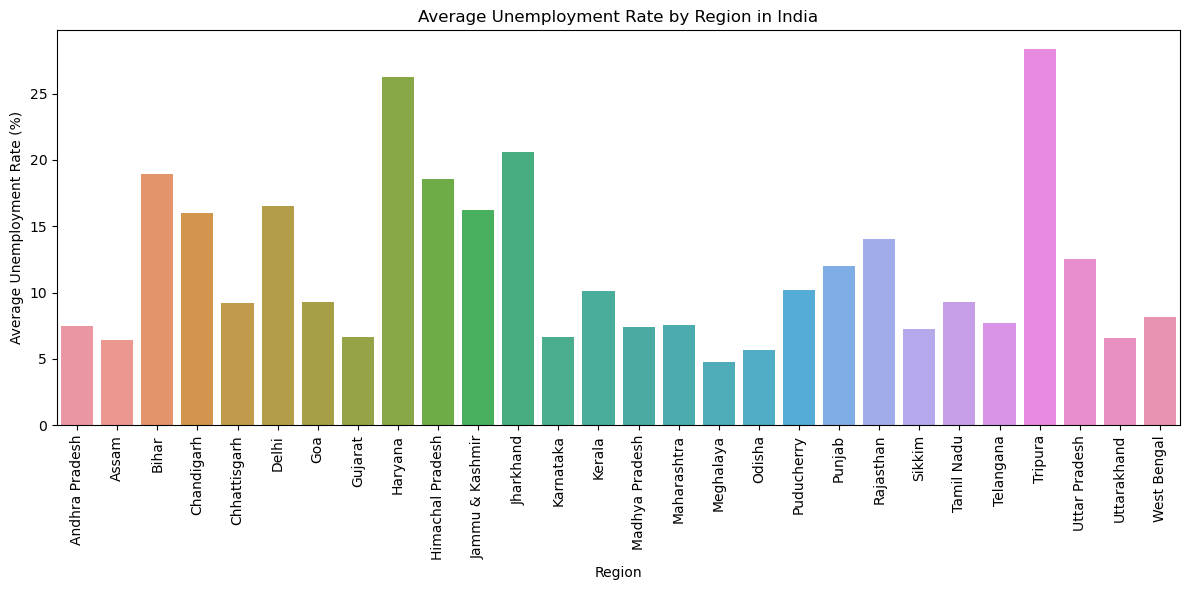

In [33]:
#or
# Group data by region and calculate the average unemployment rate
regional_avg = data1.groupby('Region')['U rate'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='U rate', data=regional_avg)
plt.title('Average Unemployment Rate by Region in India')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


3. Labour Participation Rate vs. Unemployment Rate
Purpose: To analyze the relationship between the labour participation rate and unemployment rate for different regions or time points.

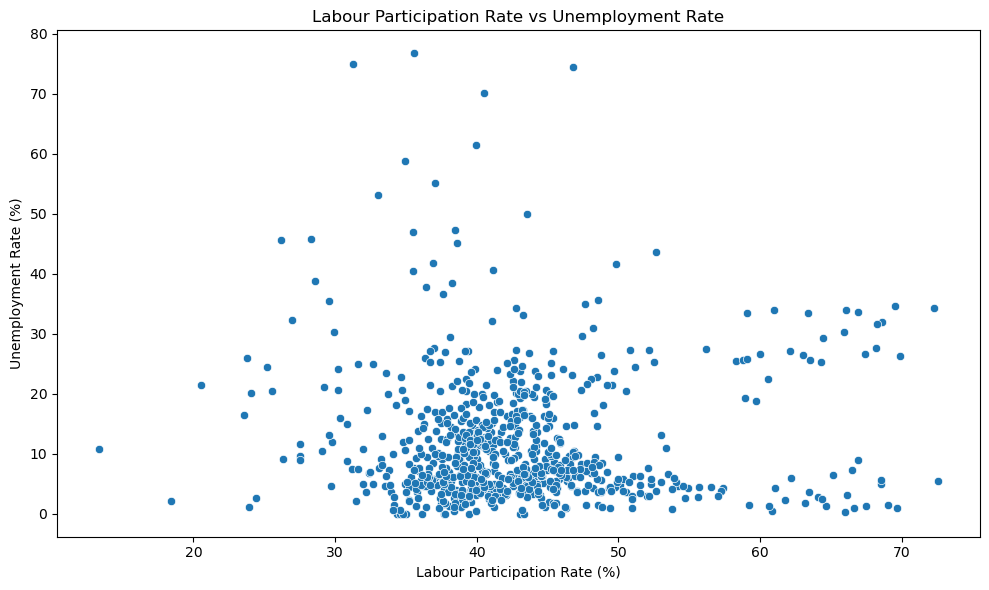

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='P Rate', y='U rate', data=data1)
plt.title('Labour Participation Rate vs Unemployment Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()
plt.show()


4. Distribution of Unemployment Rates Across Regions
Purpose: To understand the spread and distribution of unemployment rates in different regions.

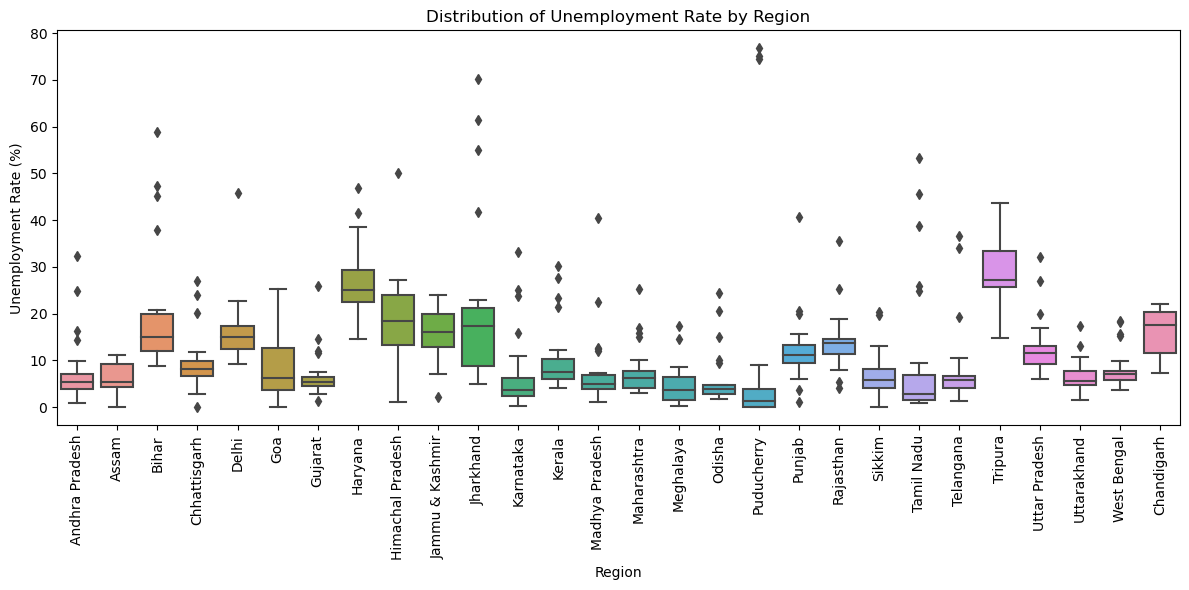

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='U rate', data=data1)
plt.title('Distribution of Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


5. Correlation Heatmap Between Key Variables
Purpose: To visualize how different columns like unemployment rate, estimated employed, labour participation rate, etc., are correlated

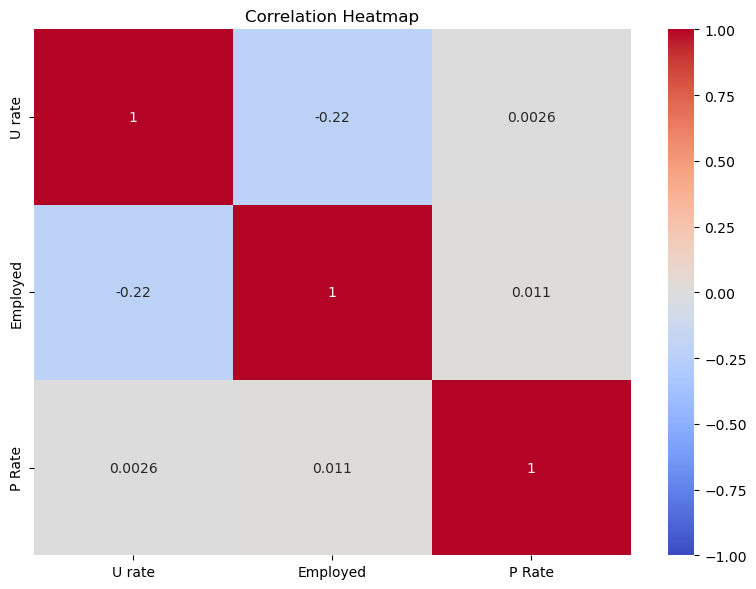

In [38]:
correlation_matrix = data1[['U rate', 'Employed', 'P Rate']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


6. Unemployment Rate by Region Over Time
Purpose: To visualize the trend of unemployment rates for different regions over time.

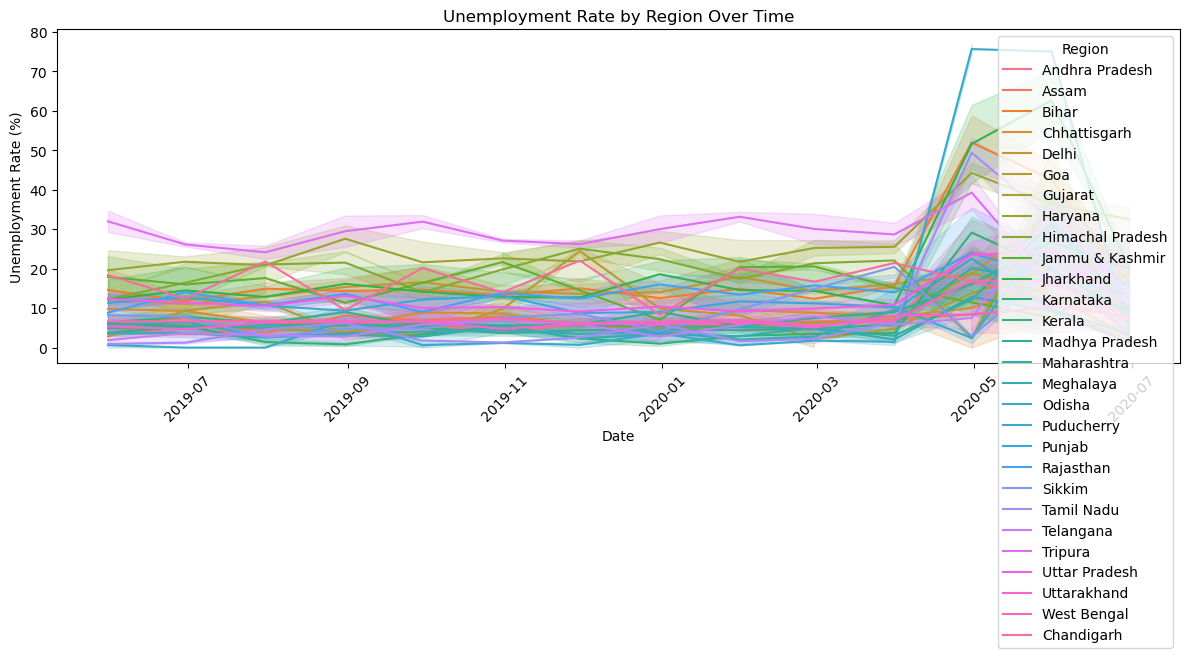

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=' Date', y='U rate', hue='Region', data=data1)
plt.title('Unemployment Rate by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
